#**스마트폰 센서 데이터 기반 모션 분류**
# 단계2 : 기본 모델링


## 0.미션

* 데이터 전처리
    * 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리 수행
* 다양한 알고리즘으로 분류 모델 생성
    * 최소 4개 이상의 알고리즘을 적용하여 모델링 수행 
    * 성능 비교
    * 각 모델의 성능을 저장하는 별도 데이터 프레임을 만들고 비교
* 옵션 : 다음 사항은 선택사항입니다. 시간이 허용하는 범위 내에서 수행하세요.
    * 상위 N개 변수를 선정하여 모델링 및 성능 비교
        * 모델링에 항상 모든 변수가 필요한 것은 아닙니다.
        * 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교하세요.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것입니다.

## 1.환경설정

### (1) 라이브러리 불러오기

* 세부 요구사항
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 필요하다고 판단되는 라이브러리를 추가하세요.

* 함수 생성

In [91]:
# 변수의 특성 중요도 계산하기
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(12, 6))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

### (2) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용
* 세부 요구사항
    - 전체 데이터 'data01_train.csv' 를 불러와 'data' 이름으로 저장합니다.
        - data에서 변수 subject는 삭제합니다.
    - 데이터프레임에 대한 기본 정보를 확인합니다.( .head(), .shape 등)

#### 1) 데이터 로딩

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
data = pd.read_csv('/content/drive/MyDrive/15 Mini Project/data01_train.csv')
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS


In [13]:
data.drop('subject', axis=1, inplace=True)

#### 2) 기본 정보 조회

In [14]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS


In [15]:
data.shape

(5881, 562)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 25.2+ MB


In [17]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,...,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,0.274811,-0.017799,-0.109396,-0.603138,-0.509815,-0.604058,-0.628151,-0.525944,-0.605374,-0.465490,...,0.126955,-0.305883,-0.623548,0.008524,-0.001185,0.009340,-0.007099,-0.491501,0.059299,-0.054594
std,0.067614,0.039422,0.058373,0.448807,0.501815,0.417319,0.424345,0.485115,0.413043,0.544995,...,0.249176,0.322808,0.310371,0.339730,0.447197,0.608190,0.476738,0.509069,0.297340,0.278479
min,-0.503823,-0.684893,-1.000000,-1.000000,-0.999844,-0.999667,-1.000000,-0.999419,-1.000000,-1.000000,...,-0.965725,-0.979261,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980143
25%,0.262919,-0.024877,-0.121051,-0.992774,-0.977680,-0.980127,-0.993602,-0.977865,-0.980112,-0.936067,...,-0.021610,-0.541969,-0.845985,-0.122361,-0.294369,-0.481718,-0.373345,-0.811397,-0.018203,-0.141555
50%,0.277154,-0.017221,-0.108781,-0.943933,-0.844575,-0.856352,-0.948501,-0.849266,-0.849896,-0.878729,...,0.133887,-0.342923,-0.712677,0.010278,0.005146,0.011448,-0.000847,-0.709441,0.182893,0.003951
75%,0.288526,-0.010920,-0.098163,-0.242130,-0.034499,-0.262690,-0.291138,-0.068857,-0.268539,-0.013690,...,0.288944,-0.127371,-0.501158,0.154985,0.285030,0.499857,0.356236,-0.511330,0.248435,0.111932
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,0.977344,0.478157,1.000000


## **2. 데이터 전처리**

* 가변수화, 데이터 분할, NaN 확인 및 조치, 스케일링 등 필요한 전처리를 수행한다. 


### (1) 데이터 분할1 : x, y

* 세부 요구사항
    - x, y로 분할합니다.

In [22]:
# target 설정
target = 'Activity'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

### (2) 스케일링(필요시)


* 세부 요구사항
    - 스케일링을 필요로 하는 알고리즘 사용을 위해서 코드 수행
    - min-max 방식 혹은 standard 방식 중 한가지 사용.

In [21]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_n = scaler.transform(x)

### (3) 데이터분할2 : train, validation

* 세부 요구사항
    - train : val = 8 : 2 혹은 7 : 3
    - random_state 옵션을 사용하여 다른 모델과 비교를 위해 성능이 재현되도록 합니다.

In [23]:
# train, validataion 분할
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2023)

## **3. 기본 모델링**



* 세부 요구사항
    - 최소 4개 이상의 알고리즘을 적용하여 모델링을 수행한다. 
    - 각 알고리즘별로 전체 변수로 모델링, 상위 N개 변수를 선택하여 모델링을 수행하고 성능 비교를 한다.
    - (옵션) 알고리즘 중 1~2개에 대해서, 변수 중요도 상위 N개를 선정하여 모델링하고 타 모델과 성능을 비교.
        * 상위 N개를 선택하는 방법은, 변수를 하나씩 늘려가며 모델링 및 성능 검증을 수행하여 적절한 지점을 찾는 것이다.

In [237]:
result_f1_scores = {}

### (1) 알고리즘1 : KNN

In [238]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score

In [239]:
# 정규화
x_max, x_min = x_train.max(), x_train.min()
x_train_n = (x_train - x_min) / (x_max - x_min)
x_val_n = (x_val - x_min) / (x_max - x_min)

In [240]:
# 모델
model_knn = KNeighborsClassifier() 

# 학습
model_knn.fit(x_train_n, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [241]:
# 예측
y_pred_knn = model_knn.predict(x_val_n)

# 평가
print(classification_report(y_val, y_pred_knn))
print(f1_score(y_val, y_pred_knn, average='macro'))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       230
           SITTING       0.94      0.84      0.89       209
          STANDING       0.86      0.94      0.90       218
           WALKING       0.99      1.00      0.99       180
WALKING_DOWNSTAIRS       1.00      0.99      1.00       165
  WALKING_UPSTAIRS       1.00      0.99      1.00       175

          accuracy                           0.96      1177
         macro avg       0.96      0.96      0.96      1177
      weighted avg       0.96      0.96      0.96      1177

0.9627919829419108


In [242]:
result_f1_scores['KNeighborsClassifier'] = f1_score(y_val, y_pred_knn, average='macro')

### (2) 알고리즘2 : DecisionTree

In [243]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score

In [244]:
# 모델
model_dtc = DecisionTreeClassifier() 

# 학습
model_dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [245]:
# 예측
y_pred_dtc = model_dtc.predict(x_val)

# 평가
print(classification_report(y_val, y_pred_dtc))
print(f1_score(y_val, y_pred_dtc, average='macro'))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       230
           SITTING       0.91      0.92      0.92       209
          STANDING       0.93      0.91      0.92       218
           WALKING       0.92      0.94      0.93       180
WALKING_DOWNSTAIRS       0.94      0.91      0.92       165
  WALKING_UPSTAIRS       0.90      0.92      0.91       175

          accuracy                           0.94      1177
         macro avg       0.93      0.93      0.93      1177
      weighted avg       0.94      0.94      0.94      1177

0.9341006521747883


In [246]:
result_f1_scores['DecisionTreeClassifier'] = f1_score(y_val, y_pred_dtc, average='macro')

#### 변수 중요도

In [247]:
li_dtc = {}
for i in range(3, 30):
    # 변수 중요도 추출
    fi_df_dtc = plot_feature_importance(model_dtc.feature_importances_, x_train.columns, result_only=True, topn=i)

    x_train_dtc = x_train[list(fi_df_dtc['feature_name'].values)]
    x_val_dtc = x_val[list(fi_df_dtc['feature_name'].values)]

    # 모델
    model_dtc2 = DecisionTreeClassifier() 

    # 학습
    model_dtc2.fit(x_train_dtc, y_train)

    # 예측
    y_pred_dtc2 = model_dtc2.predict(x_val_dtc)

    # 평가
    print(f"{i}, {f1_score(y_val, y_pred_dtc2, average='macro')}")
    li_dtc[i] = f1_score(y_val, y_pred_dtc2, average='macro')

print('-'*50)
m = max(li_dtc, key=li_dtc.get)
print(m, li_dtc[m])

3, 0.8633467010197857
4, 0.9219790686032588
5, 0.9132035153518258
6, 0.9318238601683463
7, 0.9177776171223019
8, 0.9226850226059634
9, 0.9302104376266161
10, 0.929021659962558
11, 0.9324289144572986
12, 0.9349569031305364
13, 0.9417049127650934
14, 0.9428823086739034
15, 0.9449528594538621
16, 0.9346054082327232
17, 0.9375354416972997
18, 0.9426972106192159
19, 0.9412664482264108
20, 0.9394398934054893
21, 0.9427704007944963
22, 0.9424441097366655
23, 0.9546081564015526
24, 0.9526339965301044
25, 0.9465464737793287
26, 0.9463364784760805
27, 0.9507360912169421
28, 0.9501546052896415
29, 0.946176344995878
--------------------------------------------------
23 0.9546081564015526


In [248]:
result_f1_scores['DecisionTreeClassifier2'] = li_dtc[m]

### (3) 알고리즘3 : Logistic Regression

In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

In [250]:
# 정규화
x_max, x_min = x_train.max(), x_train.min()
x_train_n = (x_train - x_min) / (x_max - x_min)
x_val_n = (x_val - x_min) / (x_max - x_min)

In [251]:
# 모델
model_lr = LogisticRegression(max_iter=5000)

# 학습
model_lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [252]:
# 예측
y_pred_lr = model_lr.predict(x_val)

# 평가
print(classification_report(y_val, y_pred_lr))
print(f1_score(y_val, y_pred_lr, average='macro'))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       230
           SITTING       0.97      0.97      0.97       209
          STANDING       0.97      0.97      0.97       218
           WALKING       0.99      1.00      0.99       180
WALKING_DOWNSTAIRS       1.00      1.00      1.00       165
  WALKING_UPSTAIRS       1.00      0.99      0.99       175

          accuracy                           0.99      1177
         macro avg       0.99      0.99      0.99      1177
      weighted avg       0.99      0.99      0.99      1177

0.9887494903222763


In [253]:
result_f1_scores['LogisticRegression'] = f1_score(y_val, y_pred_lr, average='macro')

#### 변수 중요도

In [254]:
li_lr = {}
for i in range(3, 30):
    # 변수 중요도 추출
    fi_df_lr = plot_feature_importance(model_lr.coef_[0], x_train.columns, result_only=True, topn=i)

    x_train_lr = x_train_n[list(fi_df_lr['feature_name'].values)]
    x_val_lr = x_val_n[list(fi_df_lr['feature_name'].values)]

    # 모델
    model_lr2 = LogisticRegression(max_iter=5000) 

    # 학습
    model_lr2.fit(x_train_lr, y_train)

    # 예측
    y_pred_lr2 = model_lr2.predict(x_val_lr)

    # 평가
    print(f"{i}, {f1_score(y_val, y_pred_lr2, average='macro')}")
    li_lr[i] = f1_score(y_val, y_pred_lr2, average='macro')

print('-'*50)
m = max(li_lr, key=li_lr.get)
print(m, li_lr[m])

3, 0.33733515575377665
4, 0.5047241906163029
5, 0.5033127139456589
6, 0.5098322245891863
7, 0.7212898242739815
8, 0.7314681163096782
9, 0.7714782816334105
10, 0.7696670039968935
11, 0.7748315079136111
12, 0.7741629736154013
13, 0.7782261956968344
14, 0.7999526769833666
15, 0.8053027667866678
16, 0.810781752372944
17, 0.8118276262906812
18, 0.8215415610018505
19, 0.8531913191785204
20, 0.8545632680852807
21, 0.8542497000683769
22, 0.8554890590902154
23, 0.8822406193023261
24, 0.8822102056240518
25, 0.8858782712616771
26, 0.8869244847077256
27, 0.8908380269081747
28, 0.889873731734148
29, 0.8926799406444662
--------------------------------------------------
29 0.8926799406444662


In [255]:
result_f1_scores['LogisticRegression2'] = li_lr[m]

### (4) 알고리즘4 : SVC

In [256]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score

In [257]:
# 정규화
x_max, x_min = x_train.max(), x_train.min()
x_train_n = (x_train - x_min) / (x_max - x_min)
x_val_n = (x_val - x_min) / (x_max - x_min)

In [258]:
# 모델
model_svc = SVC()

# 학습
model_svc.fit(x_train_n, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [259]:
# 예측
y_pred_svc = model_svc.predict(x_val_n)

# 평가
print(classification_report(y_val, y_pred_svc))
print(f1_score(y_val, y_pred_svc, average='macro'))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       230
           SITTING       0.94      0.93      0.94       209
          STANDING       0.94      0.94      0.94       218
           WALKING       0.99      1.00      0.99       180
WALKING_DOWNSTAIRS       1.00      1.00      1.00       165
  WALKING_UPSTAIRS       1.00      0.99      0.99       175

          accuracy                           0.98      1177
         macro avg       0.98      0.98      0.98      1177
      weighted avg       0.98      0.98      0.98      1177

0.9778112135151931


In [260]:
result_f1_scores['SVC'] = f1_score(y_val, y_pred_svc, average='macro')

### (5) 알고리즘5 : RandomForestClassifier

In [261]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

In [262]:
# 모델
model_rfc = RandomForestClassifier(random_state=2023) 

# 학습
model_rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=2023, verbose=0, warm_start=False)

In [263]:
# 예측
y_pred_rfc = model_rfc.predict(x_val)

# 평가
print(classification_report(y_val, y_pred_rfc))
print(f1_score(y_val, y_pred_rfc, average='macro'))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       230
           SITTING       0.98      0.94      0.96       209
          STANDING       0.95      0.99      0.97       218
           WALKING       0.99      0.99      0.99       180
WALKING_DOWNSTAIRS       0.98      0.98      0.98       165
  WALKING_UPSTAIRS       0.98      0.99      0.99       175

          accuracy                           0.98      1177
         macro avg       0.98      0.98      0.98      1177
      weighted avg       0.98      0.98      0.98      1177

0.9804974328507897


In [264]:
result_f1_scores['RandomForestClassifier'] = f1_score(y_val, y_pred_rfc, average='macro')

#### 변수 중요도

In [265]:
li_rfc = {}
for i in range(3, 30):
    # 변수 중요도 추출
    fi_df_rfc = plot_feature_importance(model_rfc.feature_importances_, x_train.columns, result_only=True, topn=i)

    x_train_rfc = x_train[list(fi_df_rfc['feature_name'].values)]
    x_val_rfc = x_val[list(fi_df_rfc['feature_name'].values)]

    # 모델
    model_rfc2 = RandomForestClassifier(random_state=2023) 

    # 학습
    model_rfc2.fit(x_train_rfc, y_train)

    # 예측
    y_pred_rfc2 = model_rfc2.predict(x_val_rfc)

    # 평가
    print(f"{i}, {f1_score(y_val, y_pred_rfc2, average='macro')}")
    li_rfc[i] = f1_score(y_val, y_pred_rfc2, average='macro')

print('-'*50)
m = max(li_rfc, key=li_rfc.get)
print(m, li_rfc[m])

3, 0.8669299711030339
4, 0.8629073807508996
5, 0.8817001673497141
6, 0.887496776349415
7, 0.8839054261890508
8, 0.8783913759964422
9, 0.885702867150289
10, 0.8824646444366747
11, 0.9161098824262109
12, 0.9311728157884515
13, 0.9610376973360569
14, 0.9645956892534672
15, 0.965730348929803
16, 0.9736856131474436
17, 0.9727895433864809
18, 0.9719438799284917
19, 0.9765854788997491
20, 0.9756277745380156
21, 0.9755403598725447
22, 0.9783682910867412
23, 0.975712217609836
24, 0.9755600750067571
25, 0.9847065131636961
26, 0.974369475881693
27, 0.9800784061710003
28, 0.981182297841487
29, 0.9797310031570413
--------------------------------------------------
25 0.9847065131636961


In [266]:
result_f1_scores['RandomForestClassifier2'] = li_rfc[m]

### (6) 알고리즘6 : XGBoost

In [269]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score

In [271]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [272]:
# 모델
model_xgb = XGBClassifier(random_state=2023)

# 학습
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [273]:
# 예측
y_pred_xgb = model_xgb.predict(x_val)
y_pred_xgb = le.inverse_transform(y_pred_xgb)

# 평가
print(classification_report(y_val, y_pred_xgb))
print(f1_score(y_val, y_pred_xgb, average='macro'))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       230
           SITTING       1.00      0.97      0.98       209
          STANDING       0.97      1.00      0.98       218
           WALKING       0.99      1.00      1.00       180
WALKING_DOWNSTAIRS       1.00      0.99      1.00       165
  WALKING_UPSTAIRS       1.00      1.00      1.00       175

          accuracy                           0.99      1177
         macro avg       0.99      0.99      0.99      1177
      weighted avg       0.99      0.99      0.99      1177

0.9927788966633714


In [274]:
result_f1_scores['XGBClassifier'] = f1_score(y_val, y_pred_xgb, average='macro')

### 성능시각화

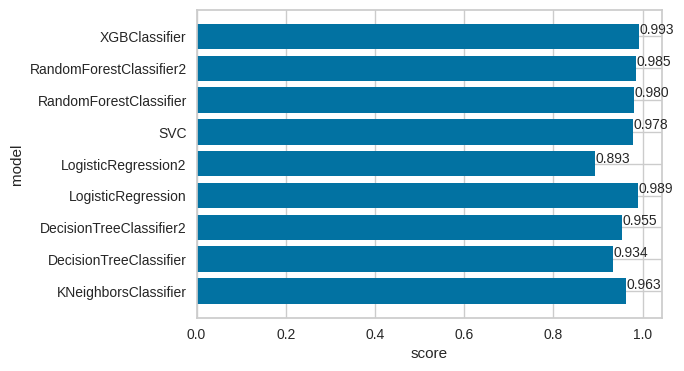

In [275]:
plt.figure(figsize=(6, 4))
bar = plt.barh(y=list(result_f1_scores), width=result_f1_scores.values())

for rect in bar:
    width = rect.get_width()
    plt.text(width + 0.04, rect.get_y() + width/2.0, '%.3f'%width, ha='center', size=10)

plt.xlabel('score')
plt.ylabel('model')

plt.show()